# OpenET DisALEXI
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

In [1]:
import pprint

import ee

from IPython.display import Image
import openet.disalexi as model

ee.Initialize()

In [2]:
ndvi_palette = ['EFE7E1', '003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
jet_palette = ['FF0000', 'FFFF00', '00FFFF', '0000FF']
viridis_palette = ['#440154', '#433982', '#30678D', '#218F8B', '#36B677', '#8ED542', '#FDE725']

image_size = 768

In [3]:
test_point = ee.Geometry.Point(-119.2747, 35.57816)
test_region = ee.Geometry.Rectangle([-119.33, 35.53, -119.17, 35.61])
# test_region = ee.Geometry.Rectangle([-119.35, 35.53, -119.15, 35.61])

### Landsat 8 Collection 2 SR Image

In [4]:
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_042035_20160715')
# landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044033_20170801')

# landsat_cs = 30
# landsat_crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
# landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326').coordinates().getInfo()# 
# landsat_dt = ee.Date(landsat_img.get('system:time_start'))

image_crs = landsat_img.select('SR_B2').projection().crs().getInfo()
image_transform = landsat_img.select('SR_B2').projection().getInfo()['transform']
image_geom = landsat_img.select('SR_B2').geometry()
print(image_transform)

[30, 0, 163185, 0, -30, 4110315]


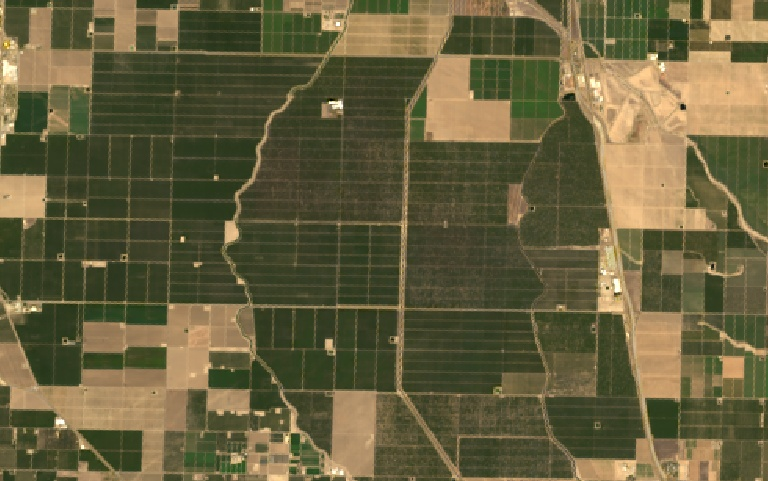

In [5]:
image_url = landsat_img.select([3, 2, 1]) \
    .multiply(0.0000275).add(-0.2) \
    .getThumbURL({'min': 0.0, 'max': 0.3, 'gamma': 1.25, 'region': test_region, 'dimensions': image_size})
#     .reproject(crs=image_crs, crsTransform=image_transform) \
Image(url=image_url, embed=True, format='png')

In [6]:
print(landsat_img.get('system:time_start').getInfo())

1468607644287


In [7]:
# Build the DisALEXI object from the Landsat image
model_obj = model.Image.from_landsat_c02_l2(
    landsat_img, 
    et_reference_source='projects/openet/assets/reference_et/california/cimis/daily/v1', 
    et_reference_band='eto',
    et_reference_factor=1.0,
    et_reference_resample='bilinear',
    stabil_iterations=10,
    albedo_iterations=10,
    # et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    # et_reference_band='eto', 
    # et_reference_factor=0.85,
)
# model_obj = disalexi.Image(ee.Image(landsat.LandsatSR(landsat_img).prep())

### NDVI

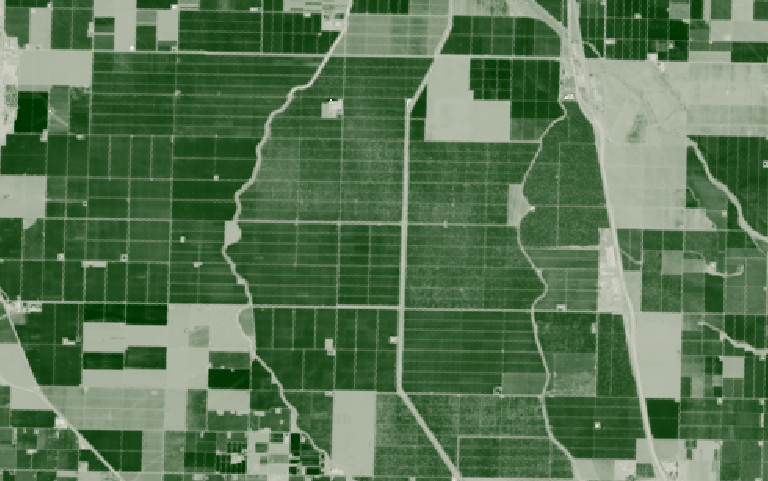

In [8]:
image_url = model_obj.ndvi \
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### LAI

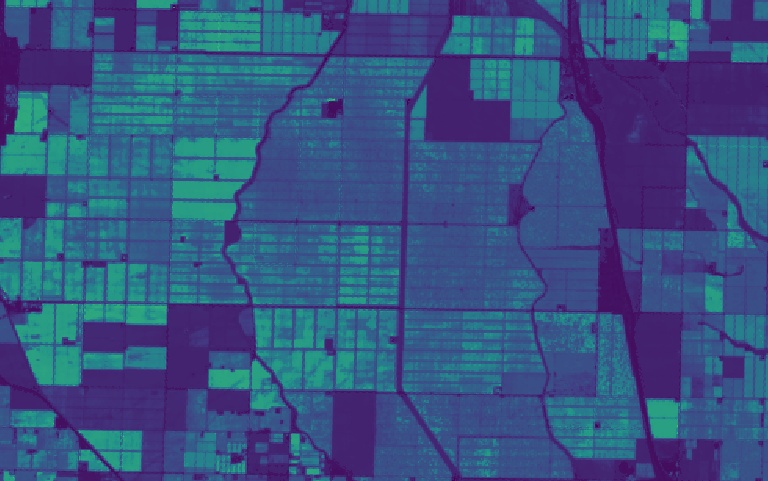

In [9]:
image_url = model_obj.lai \
    .getThumbURL({'min': 0, 'max': 5, 'palette': viridis_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Sharpened Thermal

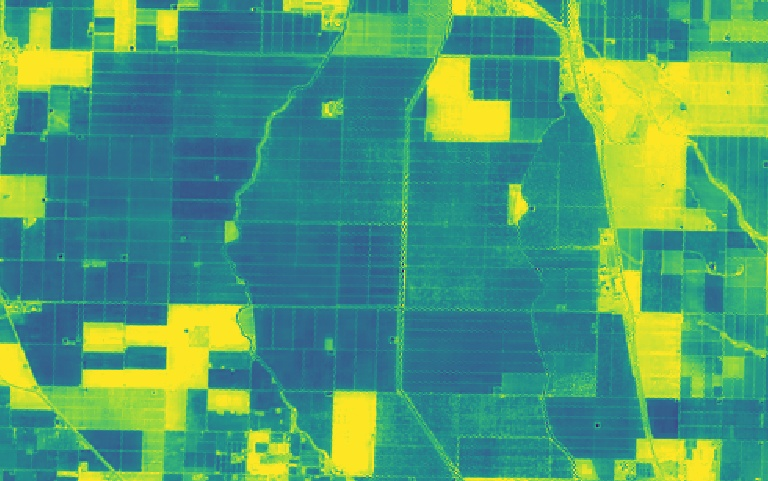

In [10]:
image_url = model_obj.lst \
    .getThumbURL({'min': 295, 'max': 330, 'palette': viridis_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Air Temperature

In [11]:
# image_url = model_obj.ta \
#     .getThumbURL({'min': 270, 'max': 320, 'palette': jet_palette, 
#                   'region': test_region, 'dimensions': image_size})
# Image(url=image_url, embed=True, format='png')

### ET

In [12]:
image_url = model_obj.et \
    .getThumbURL({'min': 0.0, 'max': 10, 'palette': et_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

HTTPError: HTTP Error 400: Bad Request

### "Calculate" Method

Return a multiband image of the model variables

In [ ]:
image_url = model_obj.calculate(['et', 'et_reference', 'et_fraction']).select(['et']) \
    .getThumbURL({'min': 0.0, 'max': 10, 'palette': et_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### ET fraction

In [ ]:
image_url = model_obj.et_fraction \
    .getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Reference ET (from CIMIS)

In [ ]:
image_url = model_obj.et_reference \
    .getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette, 
                  'region': test_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')